In [83]:
import pandas as pd
df = pd.read_csv('diabetes.csv','\t')
df.columns = ["pregnancies", "glucose", "blood_pressure", "skin_thickness","insulin","bmi","diabetes_pedigree_function","age","outcome","Unnamed"]
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome,Unnamed
0,6,148,72,35,0,33.6,0.627,50,1,NaN
1,1,85,66,29,0,26.6,0.351,31,0,NaN
2,8,183,64,0,0,23.3,0.672,32,1,NaN
3,1,89,66,23,94,28.1,0.167,21,0,NaN
4,0,137,40,35,168,43.1,2.288,33,1,NaN


In [84]:
df = df.drop(["Unnamed"],axis = 1).fillna(0)

In [85]:
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [86]:
#handling missing data 
import numpy as np
df.glucose.replace(0,np.nan,inplace = True)
df.insulin.replace(0,np.nan,inplace = True)
df.blood_pressure.replace(0,np.nan,inplace = True)
df.bmi.replace(0,np.nan,inplace = True)
df.skin_thickness.replace(0,np.nan,inplace = True)
df.age.replace(0,np.nan,inplace = True)
df.diabetes_pedigree_function.replace(0,np.nan,inplace = True)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 9 columns):
pregnancies                   47 non-null int64
glucose                       47 non-null int64
blood_pressure                45 non-null float64
skin_thickness                29 non-null float64
insulin                       20 non-null float64
bmi                           46 non-null float64
diabetes_pedigree_function    47 non-null float64
age                           47 non-null int64
outcome                       47 non-null int64
dtypes: float64(5), int64(4)
memory usage: 3.4 KB


In [88]:
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1


In [89]:
df.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
count,47.000000,47.000000,45.000000,29.000000,20.00000,46.000000,47.000000,47.000000,47.000000
mean,5.425532,129.574468,73.844444,30.827586,203.85000,32.517391,0.527787,38.021277,0.510638
std,3.567636,32.156374,14.838457,9.524663,185.03521,6.623537,0.440061,11.440754,0.505291
min,0.000000,78.000000,30.000000,11.000000,54.00000,19.900000,0.134000,21.000000,0.000000
25%,2.500000,104.500000,66.000000,24.000000,95.50000,27.450000,0.251000,29.000000,0.000000
50%,5.000000,122.000000,74.000000,32.000000,157.00000,32.250000,0.420000,33.000000,1.000000
75%,8.000000,147.500000,84.000000,37.000000,231.25000,37.475000,0.607000,49.000000,1.000000
max,13.000000,197.000000,110.000000,47.000000,846.00000,45.800000,2.288000,60.000000,1.000000


In [91]:
df = df.fillna(df.mean())
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72.0,35.000000,203.85,33.6,0.627,50,1
1,1,85,66.0,29.000000,203.85,26.6,0.351,31,0
2,8,183,64.0,30.827586,203.85,23.3,0.672,32,1
3,1,89,66.0,23.000000,94.00,28.1,0.167,21,0
4,0,137,40.0,35.000000,168.00,43.1,2.288,33,1


In [92]:
#Lets use KNN algorithm first.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
y = df['outcome'].values
X = df.drop('outcome',axis =1).values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42,stratify = y)


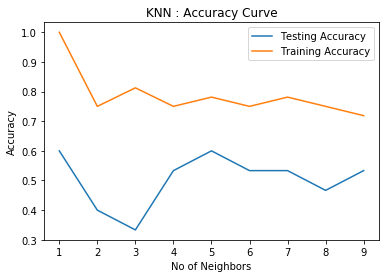

In [93]:
#instead of randomly selecting the values of n_neighbors, its better to plot the accuracy curve and then select the value of n_neighbors.
import matplotlib.pyplot as plt
import pylab
import numpy as np
neighbors  = np.arange(1,10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train,y_train)
    test_accuracy[i] = knn.score(X_test,y_test)
plt.title('KNN : Accuracy Curve')
plt.plot(neighbors,test_accuracy,label = 'Testing Accuracy')
plt.plot(neighbors,train_accuracy,label = 'Training Accuracy')
plt.xlabel('No of Neighbors')
plt.ylabel('Accuracy')
pylab.legend(loc = 'upper right')
plt.show()

In [94]:
#Accuracy curve suggest that there is a sweet spot in the middle where testing accuracy is maximum.
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
knn.score(X_test,y_test)

0.5333333333333333

In [95]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
knn.score(X_test,y_test)


0.6

In [96]:
#After scaling the insulin accuracy got increased by 3%. Without scaling the efficiecy was around 72%.
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
knn.score(X_test,y_test)

0.4666666666666667